## Notebook explaining the use of the data cleaner class

#### Importing data

In [15]:
from data_cleaner import Data_Cleaner

In [16]:
#Load data with the datacleaner class
data_container = Data_Cleaner("../data/train.csv")

In [17]:
#replace -999. with np.NaN
data_container._fill_with_NaN()

In [18]:
#replace np.NaN with feature mean
data_container.replace_with_mean()

#### Feature engineering

In [19]:
import numpy as np
polynomial_degree_vs_rmse_improvement = np.load("max_poly_test.npy")

In [20]:
#this is a N_feature X N_degree expansion (20) matrix

In [21]:
np.argmin(np.around(polynomial_degree_vs_rmse_improvement,decimals=4), axis=1)  #returns the first argmin(also degree of polynomial) that yields the best RMSE (rounded to last 4 digits)

array([ 0, 13,  3,  7,  0, 10,  0, 12,  0,  5,  4, 16,  0,  5,  1,  0,  1,
        1,  0,  0,  0,  4,  3, 10, 15, 15,  0,  0,  0, 11])

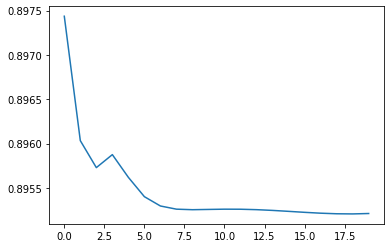

In [28]:
plt.plot(polynomial_degree_vs_rmse_improvement[1])

In [22]:
max_poly = np.argmin(np.around(polynomial_degree_vs_rmse_improvement,decimals=4), axis=1)

In [23]:
np.sum(max_poly)

136

In [24]:
data_container.build_polynomials_from_degree_array(max_poly) #build features

In [25]:
data_container.tX.shape   #-> features are expanded from 30 to 132 

(250000, 136)

In [26]:
#Normalization after feature construction!
data_container.normalize()

In [27]:
data_container.transform_to_pca()

24


#### Predict

In [28]:
from linear_model_base import RidgeRegression

In [29]:
Model = RidgeRegression(data_container)

In [30]:
Model.cross_validation(4,lambda_=0.00001)

(0.9165162910438839, 1.1034377394123493)

In [21]:
Model.cross_validation(4,lambda_=1.)

(0.9185466322323115, 0.9187389016965029)

#### Hyperparameter optimization

In [31]:
rmse_te = []
rmse_tr = []

for lambda_ in np.logspace(-8, 0, 30):
    tr, te = Model.cross_validation(4, lambda_=lambda_)
    rmse_te.append(te)
    rmse_tr.append(tr)
    print("lambda {}".format(lambda_))

lambda 1e-08
lambda 1.887391822135096e-08
lambda 3.562247890262444e-08
lambda 6.723357536499335e-08
lambda 1.2689610031679235e-07
lambda 2.395026619987486e-07
lambda 4.5203536563602405e-07
lambda 8.531678524172815e-07
lambda 1.6102620275609392e-06
lambda 3.0391953823131947e-06
lambda 5.736152510448681e-06
lambda 1.082636733874054e-05
lambda 2.0433597178569398e-05
lambda 3.856620421163472e-05
lambda 7.278953843983146e-05
lambda 0.00013738237958832637
lambda 0.0002592943797404667
lambda 0.0004893900918477489
lambda 0.0009236708571873865
lambda 0.0017433288221999873
lambda 0.003290344562312671
lambda 0.006210169418915616
lambda 0.011721022975334793
lambda 0.022122162910704502
lambda 0.041753189365604
lambda 0.07880462815669904
lambda 0.14873521072935117
lambda 0.2807216203941176
lambda 0.5298316906283702
lambda 1.0


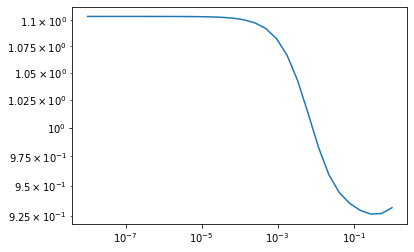

In [32]:
import matplotlib.pyplot as plt
plt.loglog(np.logspace(-8, 0, 30),rmse_te)


In [14]:
np.logspace(-8, 0, 30)[np.argmin(rmse_te)]

0.00013738237958832637

In [27]:
#argmin (optimal) lambda: when going down to 4 decimals: 0.0452035365636024
#argmin (optimal) lambda: when going down to 3 decimals: 0.01082636733874054

#### Generate prediction

In [17]:
from proj1_helpers import *

In [18]:
#transform testset data

In [24]:
#obtain weights with optimal parameters
weights = Model._run(lambda_=0.01082636733874054)


In [19]:
cleaner_data_test = Data_Cleaner("../data/test.csv")
cleaner_data_test._fill_with_NaN()
cleaner_data_test.replace_with_mean()
cleaner_data_test.build_polynomials_from_degree_array(max_poly)
cleaner_data_test.normalize()

In [25]:
OUTPUT_PATH = '../scripts/cleaned_correct_regularization.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, cleaner_data_test.tX)
create_csv_submission(cleaner_data_test.ids, y_pred, OUTPUT_PATH)